### Multiple linear regression

### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read and overview check

In [2]:
df = pd.read_csv('./input_data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [4]:
df.corr()

C:\Users\phamp\AppData\Local\Temp\ipykernel_12520\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


### EDA

In [5]:
df_sub = df[['horsepower','curb-weight','engine-size','highway-mpg','price']]

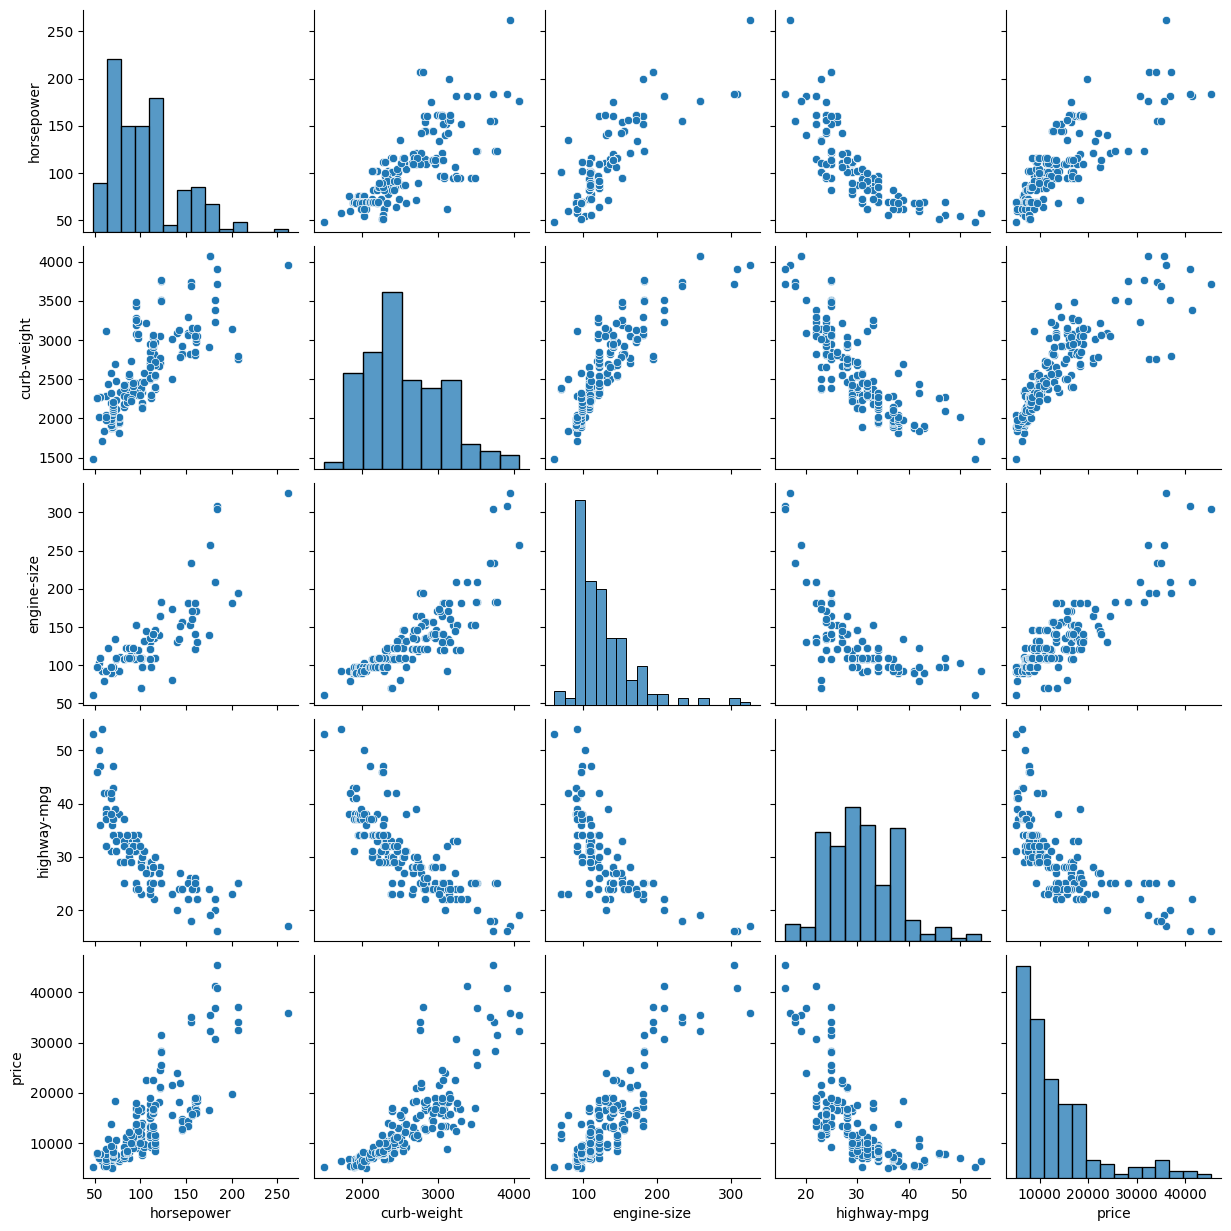

In [6]:
sns.pairplot(df_sub)
plt.show()

### Build model

In [7]:
X = df_sub.drop('price',axis=1)
y = df_sub[['price']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [49]:
y.min(), y.max()

(price    5118.0
 dtype: float64,
 price    45400.0
 dtype: float64)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_predict = model.predict(X_test)

In [51]:
y_predict.min(), y_predict.max()

(5299.331503390204, 46825.38894041242)

In [14]:
y_predict[0:5] 

array([[10512.02493477],
       [ 5893.35590471],
       [21695.39520251],
       [10902.73469845],
       [ 8816.10615384]])

In [15]:
b = model.intercept_[0]
b

-13917.886095965825

In [16]:
m = model.coef_[0]
m

array([ 19.56898552,   6.04469604,  79.557874  , -21.23634192])

In [17]:
print(f'price = {b} + {m[0]} * horsepower + {m[1]} * curb-weight + {m[2]} * engine-size + {m[-1]} * highway-mpg')

price = -13917.886095965825 + 19.56898552497127 * horsepower + 6.0446960403438865 * curb-weight + 79.55787399823197 * engine-size + -21.236341921459662 * highway-mpg


## Evaluation Model

In [18]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
full_acc = model.score(X,y)
print(f'Train acc: {train_acc}')
print(f'Test acc: {test_acc}')
print(f'Full acc: {full_acc}')

Train acc: 0.8142515650244303
Test acc: 0.7516867249866733
Full acc: 0.7994732936655966


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)
print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'rmse: {rmse}')

mse: 18236622.453963764
mae: 2499.2620212419984
rmse: 4270.435862293656


In [21]:
pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_predict)],axis=1,ignore_index=True).corr()

,0,1
0,1.000000,0.884638
1,0.884638,1.000000


In [22]:
from scipy.stats import pearsonr

In [23]:
var1 = y_predict.reshape(41,)
var2 = y_test.price.values

In [24]:
pearsonr(var1, var1)

PearsonRResult(statistic=0.9999999999999999, pvalue=7.231169149087223e-307)

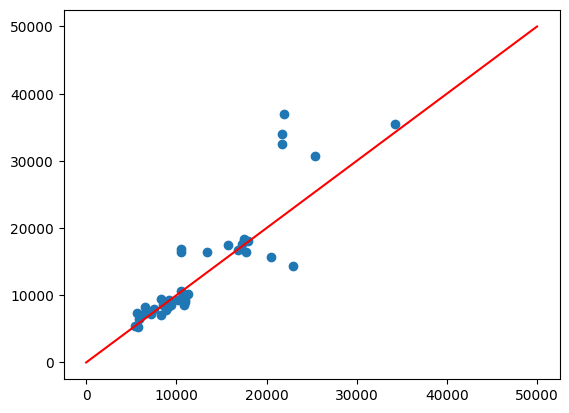

In [25]:
plt.scatter(y_predict, y_test)
plt.plot([0,50_000],[0,50_000], color='r')
plt.show()

In [26]:
import warnings
warnings.filterwarnings('ignore')

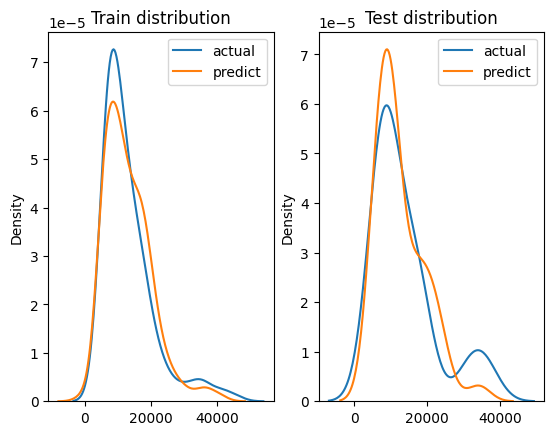

In [27]:
plt.subplot(1,2,1)
plt.title('Train distribution')
ax1 = sns.distplot(y_train,hist=False, label='actual')
sns.distplot(model.predict(X_train), ax=ax1, hist=False, label='predict')
plt.legend()
plt.subplot(1,2,2)
plt.title('Test distribution')
ax1 = sns.distplot(y_test,hist=False, label='actual')
sns.distplot(y_predict, ax=ax1, hist=False, label='predict')
plt.legend()
plt.show()

### Predict new value

In [28]:
new_data = pd.DataFrame([{'horsepower': 115, 'curb-weight': 2800, 'engine-size': 130, 'highway-mpg': 22}])

In [29]:
model.predict(new_data)

array([[15133.02024987]])

### Feature Selection

#### Kbest

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression

In [31]:
_filter = SelectKBest(score_func=f_regression, k='all')

In [32]:
k_feature = _filter.fit(X,y)

In [33]:
k_feature.scores_

array([378.49953766, 456.13885828, 633.5267598 , 196.30495976])

In [34]:
pd.DataFrame({'Feature': X.columns, 'Score':k_feature.scores_}).sort_values('Score', ascending=False)

,Feature,Score
2,engine-size,633.526760
1,curb-weight,456.138858
0,horsepower,378.499538
3,highway-mpg,196.304960


### Heatmap

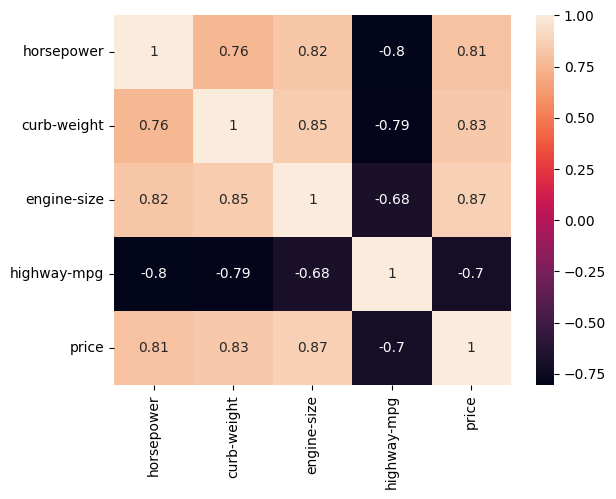

In [35]:
sns.heatmap(df_sub.corr(), annot=True)
plt.show()

#### Fisher Score

In [36]:
from sklearn.feature_selection import mutual_info_regression

In [37]:
fisher_score = mutual_info_regression(X, y)

In [38]:
fisher_score

array([0.86060457, 0.89443787, 0.82684599, 0.85685812])

In [39]:
pd.DataFrame({'Feature': X.columns, 'Score':fisher_score}).sort_values('Score', ascending=False)

,Feature,Score
1,curb-weight,0.894438
0,horsepower,0.860605
3,highway-mpg,0.856858
2,engine-size,0.826846


### Polinomial Feature

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
feature = PolynomialFeatures()

In [42]:
X_poly = feature.fit_transform(X)

In [43]:
X.shape, X_poly.shape

((201, 4), (201, 15))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y)

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_predict=model.predict(X_test)

### Evaluation Model

In [48]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
full_acc = model.score(X_poly,y)
print(f'Train acc: {train_acc}')
print(f'Test acc: {test_acc}')
print(f'Full acc: {full_acc}')

Train acc: 0.8687933238680452
Test acc: 0.7769897878820451
Full acc: 0.8386482308423916
